
## Projet data science

Objectifs:
- clustering non supervisé afin d'identifier 2 groupes de profils techniques distinctes
- prédiction des profils dont le métier n'est pas labellisé


## Données
data.csv contient 6 variables : 
    - 'Entreprise' correspond à une liste d'entreprises fictive
    - 'Metier' correspond au métier parmi data scientist, lead data scientist, data engineer et data architecte
    - 'Technologies' correspond aux compétences maîtrisées par le profil
    - 'Diplome' correspond à son niveau scolaire (Bac, Master, PhD,...)
    - 'Experience' correspond au nombre d'années d'expériences
    - 'Ville' correspond au lieu de travail
    


In [ ]:
# Import des libraries classique (numpy, pandas, ...)
from __future__ import division
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import re
from matplotlib import pyplot as plt
plt.style.use('ggplot')

### Importation et analyse de la dataset

In [9]:
# Import du dataframe "data.csv"
df = pd.read_csv('./data.csv',sep=',')
df_orig = df

In [4]:
print("Cette base de données contient {0:d} observations \n".format(df.shape[0]))
print("Voici le sommes des valeus manquantes par features : ")
print(df.isna().sum())
df.head(10)


Cette base de données contient 9582 observations 

Voici le sommes des valeus manquantes par features : 
Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64


,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,"1,5",Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux
5,S&P Global Ratings,Lead data scientist,VBA/Python/Excel/R,Master,6,Lille
6,NVIDIA,Data scientist,Excel/VBA/R/Python/PySpark,Bachelor,0,Lille
7,Cedars-Sinai Medical Center,Data scientist,Java/C/C++/R/Python,Bachelor,4,Toulouse
8,Fibroblast,Data architecte,Java/Linux/Docker,Bachelor,8,Paris
9,General Motors,Data engineer,Python/Java/Linux/GNU,Master,5,Toulouse


### imputation des valeurs manquantes pour la variable "Experience" avec : 
- la valeur médiane pour les data scientists
- la valeur moyenne pour les data engineers

In [5]:
import re
# convertir les chiffres dans le tableau en float et remplacer les ',' par des '.'
df['Experience'] = df['Experience'].apply(lambda x: float(re.sub(",", ".", x)) if isinstance(x, str) else x)


# remplire les valeurs manquantes de DE
mask_nan_de = df['Metier'] == 'Data engineer'
mean_de = df[mask_nan_de]['Experience'].dropna().mean()
df.loc[mask_nan_de, 'Experience'] = df.loc[mask_nan_de, 'Experience'].fillna(mean_de)

# remplire les valeurs manquantes de DS
mask_nan_ds = df['Metier'] == 'Data scientist'
median_ds = df[mask_nan_ds]['Experience'].dropna().median()
mean_ds = df[mask_nan_ds]['Experience'].dropna().mean()
df.loc[mask_nan_ds, 'Experience'] = df.loc[mask_nan_ds, 'Experience'].fillna(median_ds)

# remplire les valeurs manquantes de LDS
mask_nan_lds = df['Metier'] == 'Lead data scientist'
mean_lds = df[mask_nan_lds]['Experience'].dropna().mean()
df.loc[mask_nan_lds, 'Experience'] = df.loc[mask_nan_lds, 'Experience'].fillna(mean_lds)

# remplire les valeurs manquantes de DA
mask_nan_da = df['Metier'] == 'Data architecte'
mean_da = df[mask_nan_da]['Experience'].dropna().mean()
df.loc[mask_nan_da, 'Experience'] = df.loc[mask_nan_da, 'Experience'].fillna(mean_da)

print("Vérifiation des valeurs manquantes dans Experience : {0:d}.\n".format(df['Experience'].isna().sum()))



Vérifiation des valeurs manquantes dans Experience : 0.



### Années d'expériences en moyenne pour chacun des profils : le data scientist, le lead data scientist et le data engineer en moyenne

In [8]:
print("Les profils ont en moyenne:\n")
print("Lead data scientist : {0:f} d'années d'experiences".format(mean_lds))
print("Data architecte     : {0:f} ".format(mean_da))
print("Data enginner       : {0:f} ".format(mean_de))
print("Data scientist      : {0:f} ".format(mean_ds))

Les profils ont en moyenne:

Lead data scientist : 3.965261 d'années d'experiences
Data architecte     : 3.000476 
Data enginner       : 2.984959 
Data scientist      : 2.243282 


### Représentation graphique : nombre moyen d'années d'expériences pour chaque métier

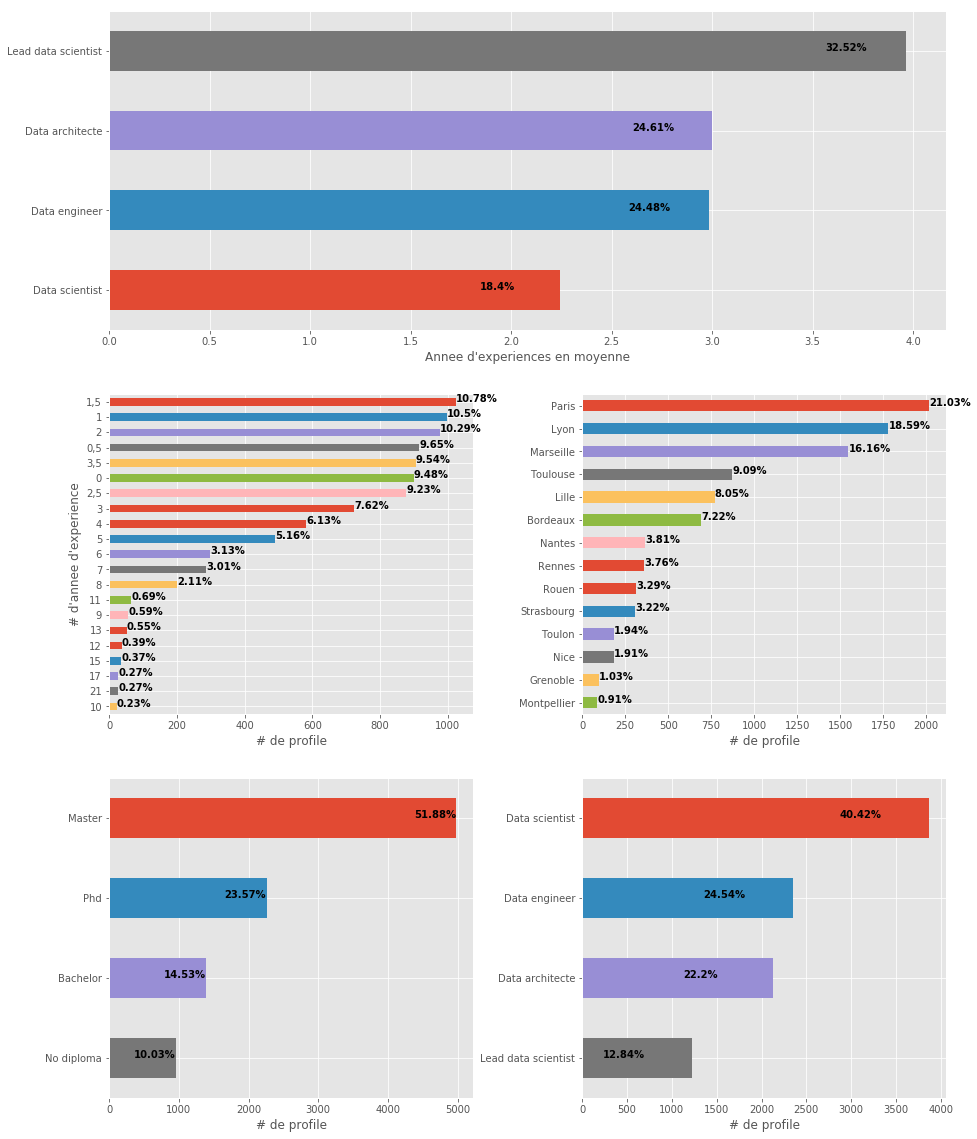

In [14]:
moy_all = [mean_ds, mean_de, mean_da, mean_lds]

def add_percentge(ax, x=0.5, y=0.25, direction='horizontal'):    
    totals=[]
    if direction=='horizontal':
        for i in ax.patches:
            totals.append(i.get_width())
        total = np.sum(totals)
        for i in ax.patches:
            str_percentage = str(round((i.get_width()/total)*100,2))+'%'
            ax.text(i.get_width()+x, i.get_y()+y, str_percentage, weight='bold', color='black')
            
    elif direction=='vertical':
        for i in ax.patches:
            totals.append(i.get_height())
        total = np.sum(totals)
        for i in ax.patches:
            str_percentage = str(round((i.get_height()/total)*100,2))+'%'
            ax.text(i.get_x()+x, i.get_height()+y, str_percentage,  weight='bold', color='black')
      
plt.figure(figsize=(15,20))
plt.subplot(311),
ax = pd.Series(moy_all, index=df['Metier'].value_counts().keys()).plot(kind='barh')
add_percentge(ax, x=-0.4, y=0.25) 
plt.xlabel("Annee d'experiences en moyenne")

# quelques graphes illustratifs
plt.subplot(323),
#pd.Series(df['Experience'].value_counts().values, df['Experience'].value_counts().keys()).plot.barh()
ax = df['Experience'].value_counts().plot(kind='barh')
add_percentge(ax), ax.invert_yaxis()
plt.xlabel("# de profile")
plt.ylabel("# d'annee d'experience")

plt.subplot(324),
ax=df['Ville'].value_counts().plot(kind='barh')
add_percentge(ax) 
plt.xlabel("# de profile")
ax.invert_yaxis()

plt.subplot(325),
ax = pd.Series(df['Diplome'].value_counts()).plot(kind='barh')
add_percentge(ax, x=-600, y=0.25) 
plt.xlabel("# de profile")
ax.invert_yaxis()

plt.subplot(326),
ax = pd.Series(df['Metier'].value_counts().values, index=df['Metier'].value_counts().keys()).plot.barh()
add_percentge(ax, x=-1000.5, y=0.25) 
plt.xlabel("# de profile")
plt.subplots_adjust(wspace=0.3, hspace=0.2)
ax.invert_yaxis()


### Transformer la variable continue 'Experience' en une nouvelle variable catégorielle 'Exp_label' à 4 modalités: débutant, confirmé, avancé et expert

In [15]:
Exp_level = pd.cut(df['Experience'], bins=4, labels=("Débutant", "Confirmé", "Avancé", "Expert"))
df["Exp_level"] = pd.Series(Exp_level, index=df.index)


# Affichage des résultats
ax = pd.Series(df['Exp_level'].value_counts().values, index=df['Exp_level'].value_counts().keys()).plot.barh(figsize=(10,7))
add_percentge(ax, x=+10.5, y=0.25) 
plt.xlabel("# de profile")
plt.subplots_adjust(wspace=0.3, hspace=0.2)
ax.invert_yaxis()

TypeError: '<=' not supported between instances of 'str' and 'float'

### les 5 technologies les plus utilisées

Le top 5 des technologies les plus utilisés sont: 

SQL/R/Python//Big data                                539
SAS/Teradata/SQL/R/Python/Machine learning/Anglais    458
C++/R/Python/Matlab/Matplotlib                        273
Hadoop/Hive/Vertica/Tableau                           250
SPSS/Excel/SAS/R/machine learning/AI/Scoring          250
Name: Technologies, dtype: int64




Text(0.5, 0, '# de profile')

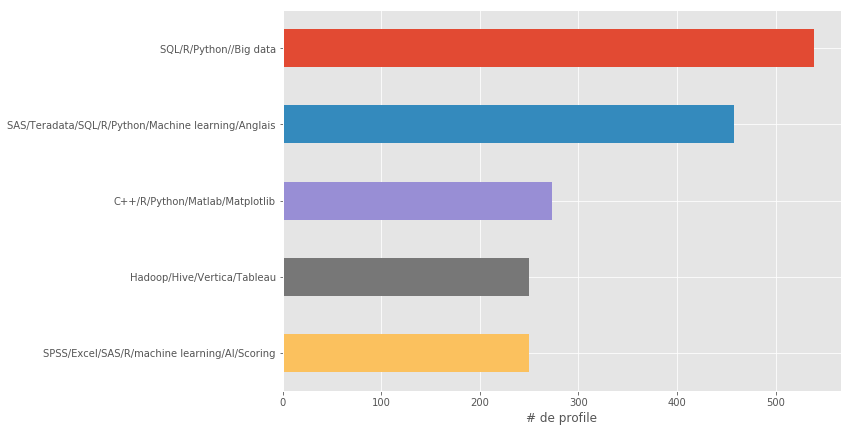

In [16]:
top_5_tech = df['Technologies'].value_counts()[0:5]
print("Le top 5 des technologies les plus utilisés sont: \n",)
print(top_5_tech)
print("\n")

# Affichage de résultat
ax = top_5_tech.plot(kind='barh', figsize=(10,7))
ax.invert_yaxis()
plt.xlabel("# de profile")


### Clustering non supervisée 


In [17]:
print("Avant d'aborder le clustering des données; il est necessaire de coder les chaines de caractetères en pour pouvoir mener le calculs par la suite.")
print("\nAvant: ")
print(df.head(10))

print("\n Après: ")
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# df_enc = 
df_enc = df.loc[:,['Experience']]
df_enc['Ville_enc'] = pd.Series(le.fit_transform(np.squeeze(df.loc[:,['Ville']])[:]), index = df_enc.index)
df_enc['Technologies_enc'] = pd.Series(le.fit_transform(np.squeeze(df.loc[:,['Technologies']])[:]), index = df_enc.index)
df_enc['Diplome_enc'] = pd.Series(le.fit_transform(np.squeeze(df.loc[:,['Diplome']])[:]), index = df_enc.index)
df_enc['Exp_level_enc'] = pd.Series(le.fit_transform(np.squeeze(df.loc[:,['Exp_level']])[:]), index = df_enc.index)
df_enc = np.round(df_enc,2)
print(df_enc.head(10))
print(df_enc.info())

Avant d'aborder le clustering des données; il est necessaire de coder les chaines de caractetères en pour pouvoir mener le calculs par la suite.

Avant: 
                                          Entreprise               Metier  \
0                                             Sanofi       Data scientist   
1                Massachusetts General Hospital(MGH)      Data architecte   
2                                              Delve  Lead data scientist   
3  Ann & Robert H. Lurie Children’s Hospital of C...       Data scientist   
4                                                Arm       Data scientist   
5                                 S&P Global Ratings  Lead data scientist   
6                                             NVIDIA       Data scientist   
7                        Cedars-Sinai Medical Center       Data scientist   
8                                         Fibroblast      Data architecte   
9                                     General Motors        Data engineer   

KeyError: "None of [['Exp_level']] are in the [columns]"

In [12]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
X = df_enc.astype(float)

# feature scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, max_iter = 100, algorithm = 'auto')
kmeans.fit(X_scaled)
labels_ = kmeans.labels_


# Evaluation de l'erreur de clustering
c1, c2 = kmeans.cluster_centers_
NMSE = lambda a,b: 100 * ((a-b)**2).sum() / ((a)**2).sum()
quad_dist1 = NMSE(X_scaled[labels_==0], c1) #NMSE() (X_scaled[y_pred==1]  - c2)**2).sum() / ((X_scaled[y_pred==1] )**2).sum()*100
quad_dist2 = NMSE(X_scaled[labels_==1], c2) # (X_scaled[y_pred==0]  - c1)**2).sum() / ((X_scaled[y_pred==0] )**2).sum()*100
print('La méthode choisi pour le clustering est K-Means, pour sa simplicité et la connaissance du nombre de cluster')
print('La métrique utilisée est l"erreur moyenne quadratique normalisée par rapports pour chaque cluster: {0:2.2f}% et {1:2.2f} %'.format(quad_dist1, quad_dist2))

print("les erreurs de clustering obtenus sont < 20% ")
print(" \n Les caracteristiques imortantes des deux clusters sont le 'Diplome' et l'Experience'. \
      \n 'Master' & 'Bachelor' pour le premier cluster et 'No diplome' & 'PhD' pour le deuxieme cluster. \
      \n De plus, le nombre d'Experience des profiles du premier cluster est beaucoup plus élevés par rapport aux profiles du deuxieme cluster. ")
print("On remarque aussi que deux technologies revient pus souvent dans le cluster 2 qui sont : ")
print(df.loc[labels_==0,'Technologies'].value_counts()[0:2])
print('Tandis que les technologies sont répartis uniformement pour le premier cluster.')
print("Le résultats de ce clustering porte un sens tout à fait logique et les figures l'illustre très bien.")

# Affichage des résultats
print("\n Affichage des caractéristiques du premier cluster : \n")      
plt.figure(figsize=(20,30))
plt.subplot(521),
ax = df_enc.loc[labels_==1,'Experience'].plot(kind='hist', color='#fdb861ff', label='cluster_1')
plt.legend()
plt.xlabel("Experience")
plt.subplot(522),
ax = df_enc.loc[labels_==0,'Experience'].plot(kind='hist', color='#5c3a97ff', label='cluster_2')
plt.xlabel("Experience")
plt.legend()

plt.subplot(523),
ax = df.loc[labels_==1,'Diplome'].value_counts().plot(kind='bar', color='#fdb861ff', label='cluster_1')
plt.legend()
plt.subplot(524),
ax = df.loc[labels_==0,'Diplome'].value_counts().plot(kind='bar', color='#5c3a97ff', label='cluster_2')
plt.ylabel("# de profile")
plt.legend()

plt.subplot(513),
ax = df.loc[labels_==0,'Ville'].value_counts().plot(kind='bar', color = '#5c3a97ff', label='cluster_2')
ax = df.loc[labels_==1,'Ville'].value_counts().plot(kind='bar', color = '#fdb861ff', label='cluster_1')
plt.ylabel("# de profile")
plt.xlabel("Ville")
plt.legend()

plt.subplot(514),
ax = df_enc.loc[labels_==0,'Technologies_enc'].value_counts()[0:5].plot(kind='bar', color = '#5c3a97ff', label='cluster_2')
ax = df_enc.loc[labels_==1,'Technologies_enc'].value_counts()[0:5].plot(kind='bar', color = '#fdb861ff', label='cluster_1')
plt.ylabel("# de profile")
plt.xlabel("# Technologie_enc")
plt.legend()



plt.subplot(529)
ax=df.loc[labels_==1,'Exp_level'].value_counts().plot(kind='bar', color='#fdb861ff', label='cluster_1')
plt.subplot(5,2,10)
ax=df.loc[labels_==0,'Exp_level'].value_counts().plot(kind='bar', color='#5c3a97ff', label='cluster_2')
plt.ylabel("# de profile")


plt.subplots_adjust(hspace=0.3)



ValueError: could not convert string to float: '1,5'

### 9) Réaliser la prédiction des métiers manquants dans la base de données par l'algorithme de votre choix
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

mask_metier = df.loc[:,'Metier'].isna() 
X = np.array(df_enc[~mask_metier])
y = le.fit_transform(df.loc[~mask_metier,'Metier'].dropna())
Metier_test = np.array(df_enc[mask_metier])


X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.25, shuffle=True, random_state=40)

clf = LogisticRegressionCV(cv=5, random_state=0, max_iter=400, multi_class='multinomial').fit(X_train, y_train)

# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
cm = confusion_matrix(y_test, dtree_predictions) 

y_predicted = clf.predict(X_test)
print('Precision de classification est de: '+str(np.round(accuracy_score(y_test, y_predicted),2)*100)+'%   \n')
print(classification_report(y_test, y_predicted))

In [ ]:
print(str(accuracy_score(y_test, y_predicted)*100)+'%')

In [ ]:
cm = confusion_matrix(y_test, y_predicted) 
cm

In [ ]:
df.loc[~mask_metier, 'Metier_predicted'] = df.loc[:,'Metier']
df.loc[mask_metier, 'Metier_predicted'] = le.inverse_transform(metier_predicted)
print("Le résultat de prediction des métiers manquants est obtenu à l'aide d'une classification des données avec une regression logistique multi-class:\n")
df[mask_metier]